In [1]:
# EVALUACIÓN 2

In [2]:
import os, geopandas as gpd

In [3]:
# Se leen las carpetas de los paises que en este caso son tres: paises, ríos y ciudades
countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [4]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [5]:
# Solo utilizamos los mapas pero especificando el país, en mi caso el país que elegí -> Colombia
colombia=countries[countries.COUNTRY=='Colombia']

<Axes: >

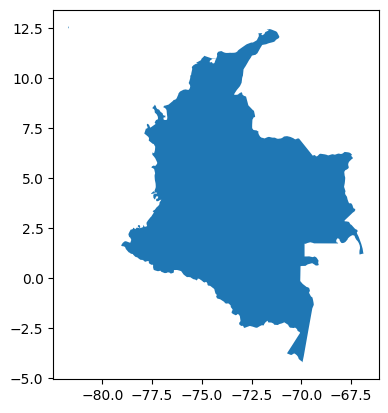

In [6]:
# Proyectamos el mapa 
colombia.plot()

<Axes: >

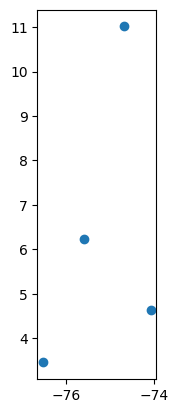

In [7]:
# Solo conservamos las ciudades de Colombia y las proyectamos
cities_colombia=cities[cities.COUNTRY=='Colombia']

cities_colombia.plot()

In [8]:
cities_colombia.head()

NAME   COUNTRY CAPITAL                    geometry
248      Medellin  Colombia       N   POINT (-75.59203 6.24115)
251        Bogota  Colombia       Y   POINT (-74.08051 4.63022)
255          Cali  Colombia       N   POINT (-76.52244 3.45686)
491  Barranquilla  Colombia       N  POINT (-74.68000 11.01429)

In [11]:
# Para conservar solo los ríos de Colombia utilizamos la función recorte
rivers_colombia = gpd.clip(gdf=rivers,
                               mask=colombia)

<Axes: >

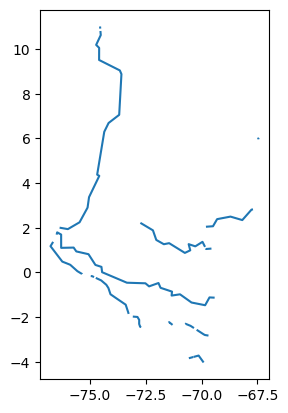

In [12]:
#Proyectamos los ríos
rivers_colombia.plot()

In [13]:
rivers_colombia.head()

NAME  SYSTEM                                           geometry
1      Amazon  Amazon  MULTILINESTRING ((-69.90597 -4.03453, -70.1301...
60   Putamayo  Amazon  MULTILINESTRING ((-76.65652 1.36565, -76.77346...
29     Japura  Amazon  LINESTRING (-76.49902 1.68926, -76.47430 1.792...
66  Rio Negro  Amazon  MULTILINESTRING ((-69.80154 2.04259, -69.48542...
39  Magdelena    None  MULTILINESTRING ((-76.36597 2.00065, -75.99487...

<Axes: >

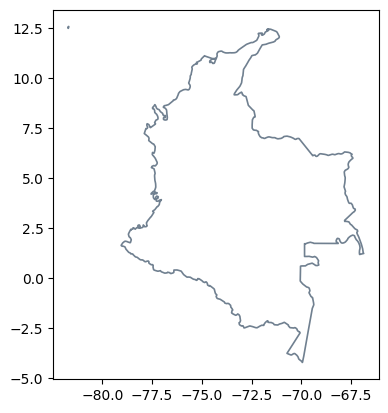

In [14]:
#Ahora realizaremos unos ajustes visuales capa por capa para ver sus resultados
#En general, no le pondremos ningún color al siguiente polígono, mas sí le agregamos uno al contorno para diferenciarlo
#También se cambia el grosor de este
colombia.plot(facecolor="white", edgecolor="slategray", linewidth=1.2)

<Axes: >

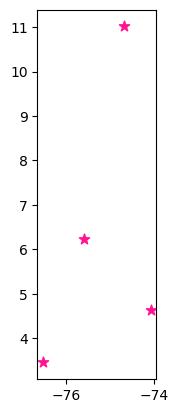

In [15]:
#Mostraremos las ciudades como una estrella
#Les pondremos un color que resalte y tendrán un tamaño mayor
cities_colombia.plot(facecolor="deeppink", marker="*", markersize=60)

<Axes: >

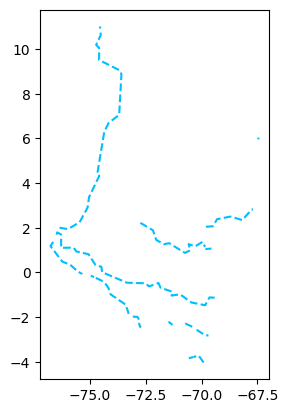

In [16]:
#Por último, añadimos la hidrografía
#Le cambiamos de color, el estilo de las líneas y su grosor
rivers_colombia.plot(edgecolor="deepskyblue", linestyle="dashed", linewidth=1.5)

<Axes: >

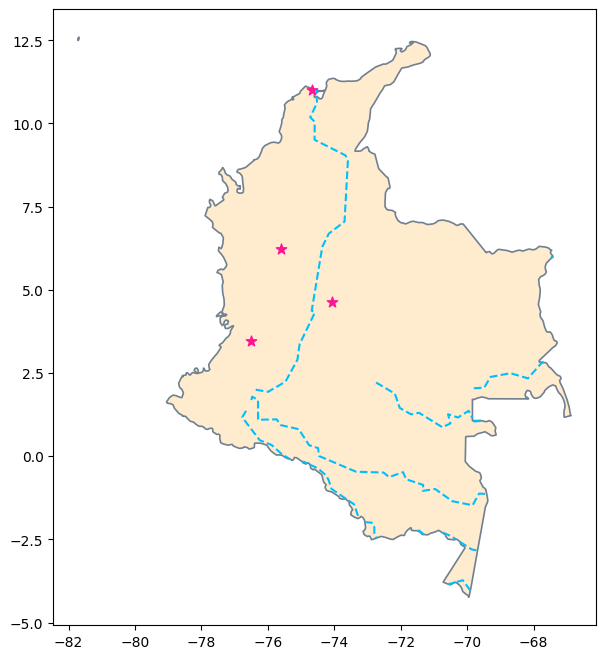

In [17]:
#Mostramos la versión recortada
base = colombia.plot(facecolor='blanchedalmond', edgecolor='slategray', linewidth=1.2,figsize=(10,8))
cities_colombia.plot(marker='*', color='deeppink', markersize=60,ax=base)
rivers_colombia.plot(edgecolor='deepskyblue', linestyle='dashed', linewidth=1.5,ax=base)

In [18]:
#Verificamos el CRS está proyectado o no
colombia.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [19]:
#Hallamos el centroide
colombia.centroid

C:\Users\Enrique\AppData\Local\Temp\ipykernel_14100\284488655.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  colombia.centroid


47    POINT (-73.07321 3.90075)
dtype: geometry

In [20]:
#Colocamos el CRS para el país
colombia.to_crs(21897).crs.axis_info

[Axis(name=Northing, abbrev=X, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Easting, abbrev=Y, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [21]:
colombia.to_crs(21897).centroid

47    POINT (1112477.774 921838.616)
dtype: geometry

<Axes: >

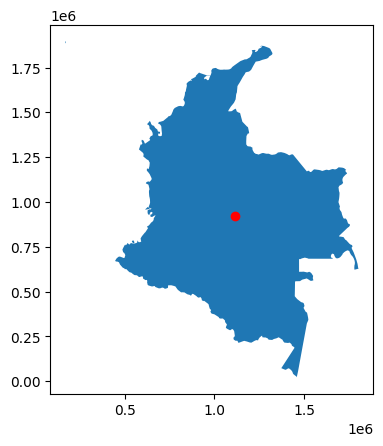

In [22]:
#Reproyectamos
base21897=colombia.to_crs(21897).plot()
colombia.to_crs(21897).centroid.plot(color='red',ax=base21897)

In [23]:
#Mantenemos la versión proyectada para todos los mapas
colombia_21897=colombia.to_crs(21897)
# just Brazil

cities_colombia=cities[cities.COUNTRY=='Colombia']
cities_21897=cities_colombia.to_crs(colombia_21897.crs)

rivers_21897=rivers.to_crs(colombia_21897.crs)
rivers_21897=gpd.clip(gdf=rivers_21897,mask=colombia_21897)

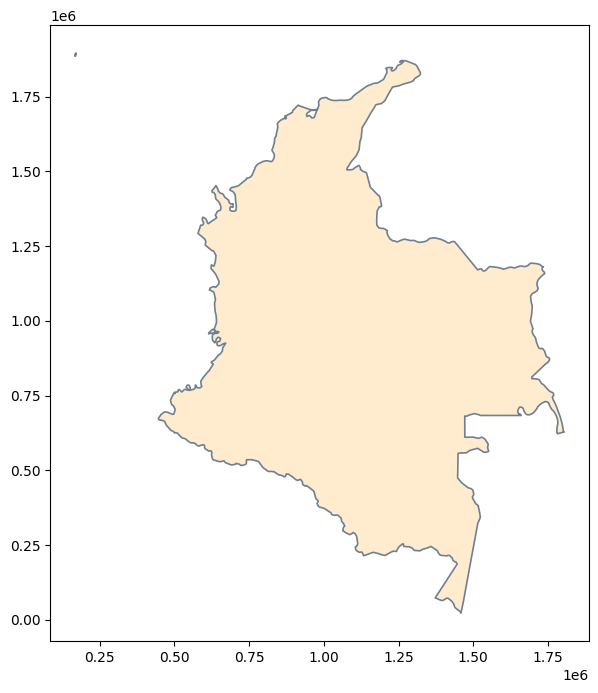

In [24]:
base = colombia_21897.plot(facecolor='blanchedalmond', edgecolor='slategray', linewidth=1.2,figsize=(10,8))

<Axes: >

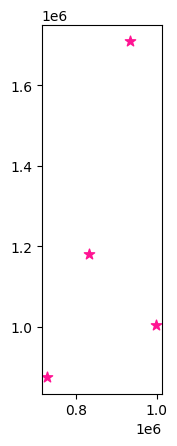

In [25]:
cities_21897.plot(marker='*', color='deeppink', markersize=60)

<Axes: >

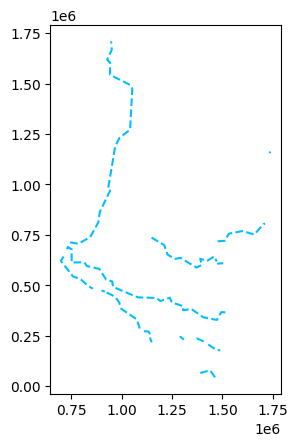

In [26]:
rivers_21897.plot(edgecolor='deepskyblue', linestyle='dashed', linewidth=1.5)

<Axes: >

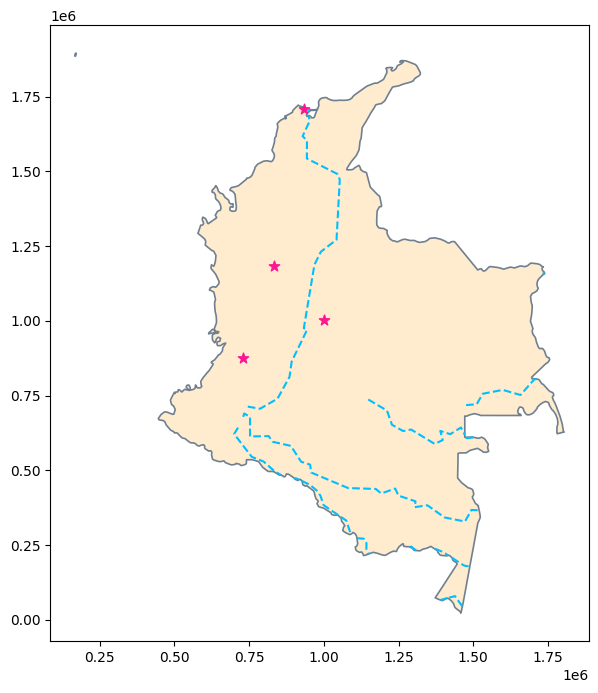

In [27]:
#Ahora mostramos todo en conjunto
base = colombia_21897.plot(facecolor='blanchedalmond', edgecolor='slategray', linewidth=1.2,figsize=(10,8))
cities_21897.plot(marker='*', color='deeppink', markersize=60,ax=base)
rivers_21897.plot(edgecolor='deepskyblue', linestyle='dashed', linewidth=1.5,ax=base)

In [29]:
# Proyectamos utilizando las coordenadas -> Mapa interactivo
colombiaCoord=[4.570868, -74.297333]

In [30]:
#Ahora lo presentaremos de manera interactiva
#Importaremos folium
import folium

m = cities_colombia.explore(color="red", 
                   name="cities")

m = rivers_colombia.explore(m=m, color="blue",
                  name="rivers")
folium.LayerControl().add_to(m) 
m

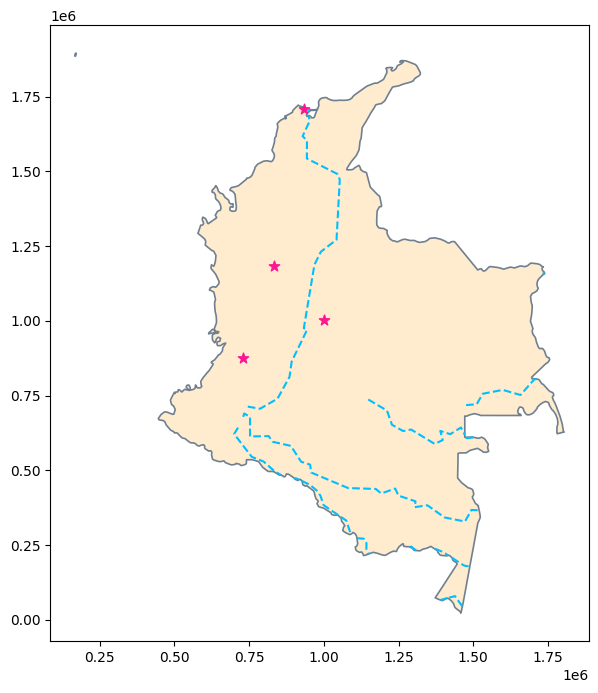

In [32]:
#Guardamos al mapa como imágen en la carpeta figures
import matplotlib.pyplot as plt

base = colombia_21897.plot(facecolor='blanchedalmond', edgecolor='slategray', linewidth=1.2,figsize=(10,8))
map2=cities_21897.plot(marker='*', color='deeppink', markersize=60,ax=base)
mapEnd=rivers_21897.plot(edgecolor='deepskyblue', linestyle='dashed', linewidth=1.5,ax=base)
plt.savefig(os.path.join("figures",'mapColombia.jpg'))

In [33]:
countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")

In [34]:
#Este link fue sacado de Github
#Podemos llamar el mapa con el URL
worldMaps='https://github.com/ZairaYacsavilca/simple_plot/raw/main/maps/worldMaps.gpkg'

In [35]:
#Las capas del mapa son las siguientes
from  fiona import listlayers

listlayers(worldMaps)

['countries', 'cities', 'rivers']

In [36]:
#Podemos utilizar esta información para construir de nuevo el mapa del país
countries=gpd.read_file(worldMaps,layer='countries')
cities=gpd.read_file(worldMaps,layer='cities')
rivers=gpd.read_file(worldMaps,layer='rivers')

<Axes: >

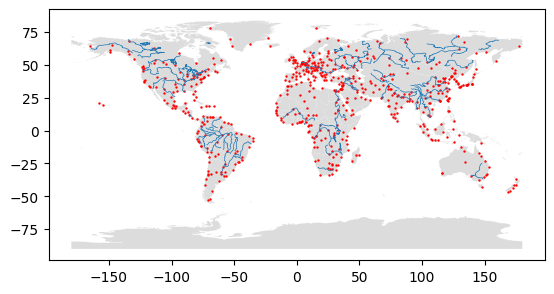

In [37]:
base = countries.plot(facecolor='gainsboro')
cities.plot(ax=base, markersize=0.5, color='red') 
rivers.plot(ax=base, linewidth=0.5)

In [38]:
import os

colombia_21897.to_file(os.path.join("maps","colombia_21897","colombiaMaps_21897.gpkg"), layer='countries', driver="GPKG")
colombia_21897.to_file(os.path.join("maps","colombia_21897","colombiaMaps_21897.gpkg"), layer='cities', driver="GPKG")
rivers_21897.to_file(os.path.join("maps","colombia_21897","colombiaMaps_21897.gpkg"), layer='rivers', driver="GPKG")